In [16]:
import pandas as pd
import numpy as np
import statsmodels.stats.weightstats as stm
import math
import scipy.stats as st

df= pd.read_csv("Dataset.csv")
print(df.head())
data= df["AGE"].to_numpy()
x_bar= np.mean(data)
s=np.std(data, ddof=1)
n=len(data)
print(f"mean:{x_bar:.2f}, standard:{s:.2f}")

c_lvl=0.95
std_err= s/math.sqrt(n)
z_score=st.norm.ppf(1-(1-c_lvl)/2)

margin_err = z_score * std_err
ci_low = x_bar - margin_err
ci_upp = x_bar + margin_err

print(f"95% Confidence Interval: ({ci_low:.2f}, {ci_upp:.2f})")

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
mean:53.53, standard:8.80
95% Confidence Interval: (52.98, 54.07)


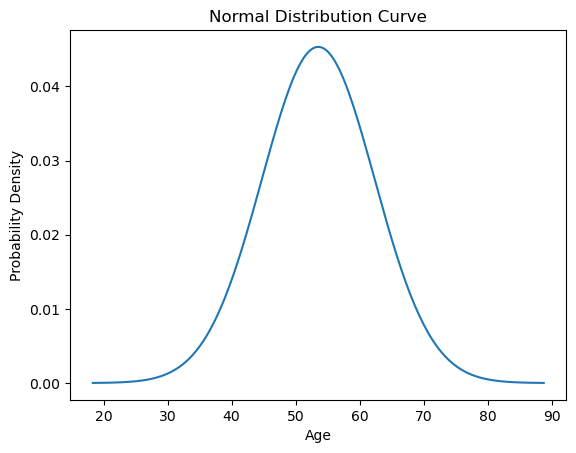

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

mean = 53.53
std_dev = 8.80

x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 200)
pdf = st.norm.pdf(x, mean, std_dev)

plt.plot(x, pdf)
plt.title('Normal Distribution Curve')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.show()


Mean: 53.53, Std Dev: 8.80, Sample Size: 1000
95% Confidence Interval: (52.98, 54.07)
T-statistic: 12.6790
P-value: 0.0000
结果显著，拒绝 H0（均值不等于 50）


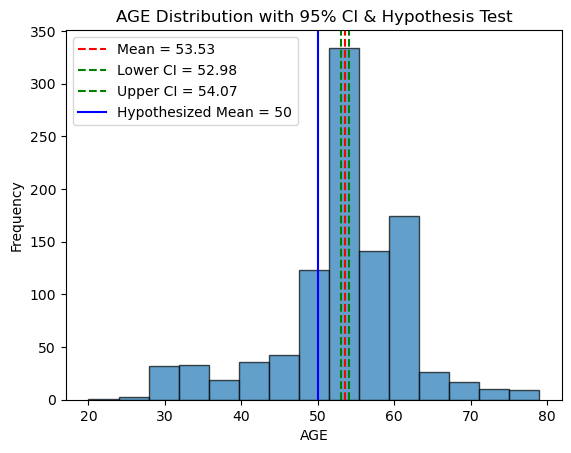

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("Dataset.csv")
data = df["AGE"].to_numpy()

# Sample Statistics
x_bar = np.mean(data)
s = np.std(data, ddof=1)
n = len(data)

print(f"Mean: {x_bar:.2f}, Std Dev: {s:.2f}, Sample Size: {n}")

# Confidence interval calculation
c_lvl = 0.95
std_err = s / math.sqrt(n)
z_score = st.norm.ppf(1 - (1 - c_lvl) / 2)
margin_err = z_score * std_err
ci_low = x_bar - margin_err
ci_upp = x_bar + margin_err

print(f"{c_lvl*100:.0f}% Confidence Interval: ({ci_low:.2f}, {ci_upp:.2f})")

# --------------------------
# 单样本 t 检验
# --------------------------
mu_0 = 50  # 假设的总体均值
t_stat, p_value = st.ttest_1samp(data, mu_0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("结果显著，拒绝 H0（均值不等于 50）")
else:
    print("结果不显著，无法拒绝 H0（均值可能等于 50）")

# 绘制直方图
plt.hist(data, bins=15, edgecolor="black", alpha=0.7)
plt.axvline(x_bar, color="red", linestyle="--", label=f"Mean = {x_bar:.2f}")
plt.axvline(ci_low, color="green", linestyle="--", label=f"Lower CI = {ci_low:.2f}")
plt.axvline(ci_upp, color="green", linestyle="--", label=f"Upper CI = {ci_upp:.2f}")
plt.axvline(mu_0, color="blue", linestyle="-", label=f"Hypothesized Mean = {mu_0}")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.title("AGE Distribution with 95% CI & Hypothesis Test")
plt.legend()
plt.show()


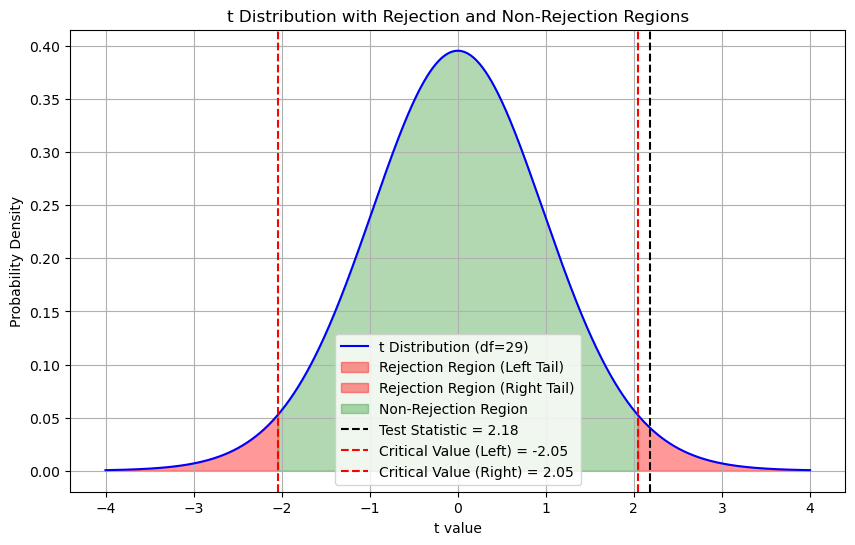

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Sample statistics
# 样本统计量
sample_mean = 53.5 
mu0 = 50  # Hypothesized population mean
          # 假设的总体均值
sample_std = 8.8
n = 30
alpha = 0.05  # Significance level
              # 显著性水平
df = n - 1    # Degrees of freedom
              # 自由度

# Compute standard error
# 计算标准误差
 se= sample_std/math.sqrt(n)

# Compute t statistic
# 计算 t 统计量
t_stats=(sample_mean-mu0)/se

# Range of x values for t-distribution plot
# t 分布绘图的横坐标范围
t

# Critical values for two-tailed test
# 双尾检验的临界值
t_crit_low

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't Distribution (df={df})', color='blue')
# 画出 t 分布曲线

# Fill rejection regions (tails)
# 填充拒绝区（两尾）
plt.fill_between(x, 0, y, where=(x <= t_crit_low), color='red', alpha=0.4, label='Rejection Region (Left Tail)')
plt.fill_between(x, 0, y, where=(x >= t_crit_high), color='red', alpha=0.4, label='Rejection Region (Right Tail)')

# Fill non-rejection region (middle)
# 填充不拒绝区（中间部分）
plt.fill_between(x, 0, y, where=(x > t_crit_low) & (x < t_crit_high), color='green', alpha=0.3, label='Non-Rejection Region')

# Mark the calculated t statistic
# 标记计算得到的 t 统计量位置
plt.axvline(t_stat, color='black', linestyle='--', label=f'Test Statistic = {t_stat:.2f}')

# Mark critical values
# 标记临界值位置
plt.axvline(t_crit_low, color='red', linestyle='--', label=f'Critical Value (Left) = {t_crit_low:.2f}')
plt.axvline(t_crit_high, color='red', linestyle='--', label=f'Critical Value (Right) = {t_crit_high:.2f}')

plt.title('t Distribution with Rejection and Non-Rejection Regions')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


mean:53.53, number:1000, sample_standard_deviation:8.80
t = 12.6790, p = 0.0000


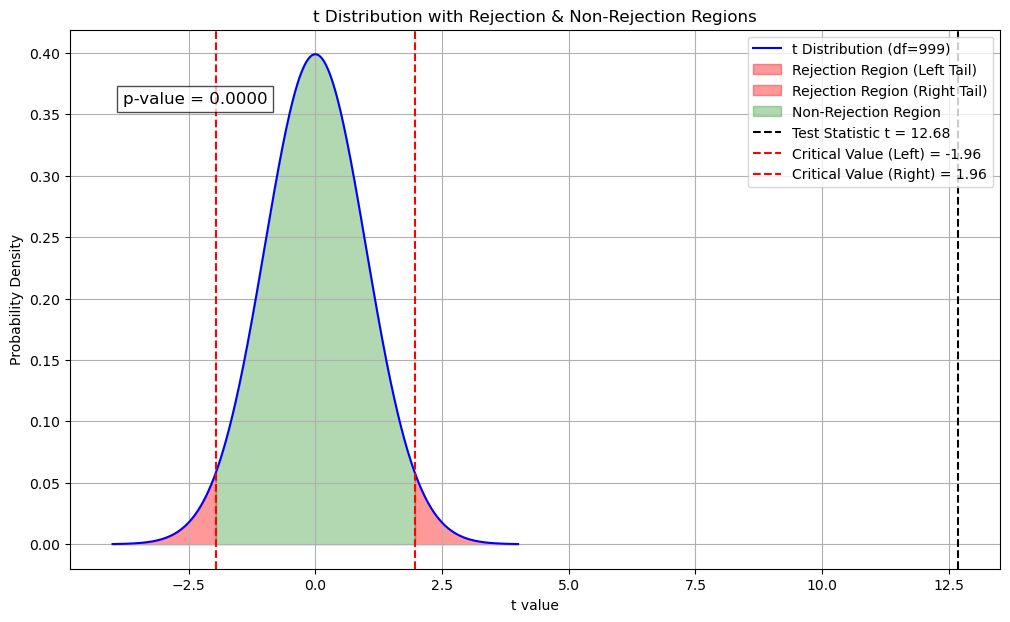

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import t

# Load data
df = pd.read_csv("Dataset.csv")
data = df["AGE"].to_numpy()

# Sample statistics
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # sample standard deviation
n = len(data)
dfree = n - 1  # degrees of freedom

print(f"mean:{x_bar:.2f}, number:{n}, sample_standard_deviation:{s:.2f}")

# Perform one-sample t-test (right-tailed)
t_stat, p_value = st.ttest_1samp(data, 50, alternative='two-sided')
print(f't = {t_stat:.4f}, p = {p_value:.4f}')

# Standard error (for reference)
se = s / np.sqrt(n)

# Critical values for two-tailed test (for plotting)
alpha = 0.05
t_crit_low = t.ppf(alpha / 2, dfree)
t_crit_high = t.ppf(1 - alpha / 2, dfree)

# Two-tailed p-value (for plot annotation)
p_two_tail = 2 * (1 - t.cdf(abs(t_stat), dfree))

# Prepare t-distribution curve
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, dfree)

plt.figure(figsize=(12, 7))
plt.plot(x, y, label=f't Distribution (df={dfree})', color='blue')

# Fill rejection regions (two-tailed)
plt.fill_between(x, 0, y, where=(x <= t_crit_low), color='red', alpha=0.4, label='Rejection Region (Left Tail)')
plt.fill_between(x, 0, y, where=(x >= t_crit_high), color='red', alpha=0.4, label='Rejection Region (Right Tail)')

# Fill non-rejection region (middle)
plt.fill_between(x, 0, y, where=(x > t_crit_low) & (x < t_crit_high), color='green', alpha=0.3, label='Non-Rejection Region')

# Mark the calculated t statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f'Test Statistic t = {t_stat:.2f}')

# Mark critical values
plt.axvline(t_crit_low, color='red', linestyle='--', label=f'Critical Value (Left) = {t_crit_low:.2f}')
plt.axvline(t_crit_high, color='red', linestyle='--', label=f'Critical Value (Right) = {t_crit_high:.2f}')

# Add p-value text on the plot
plt.text(-3.8, max(y)*0.9, f'p-value = {p_value:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.title('t Distribution with Rejection & Non-Rejection Regions')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()




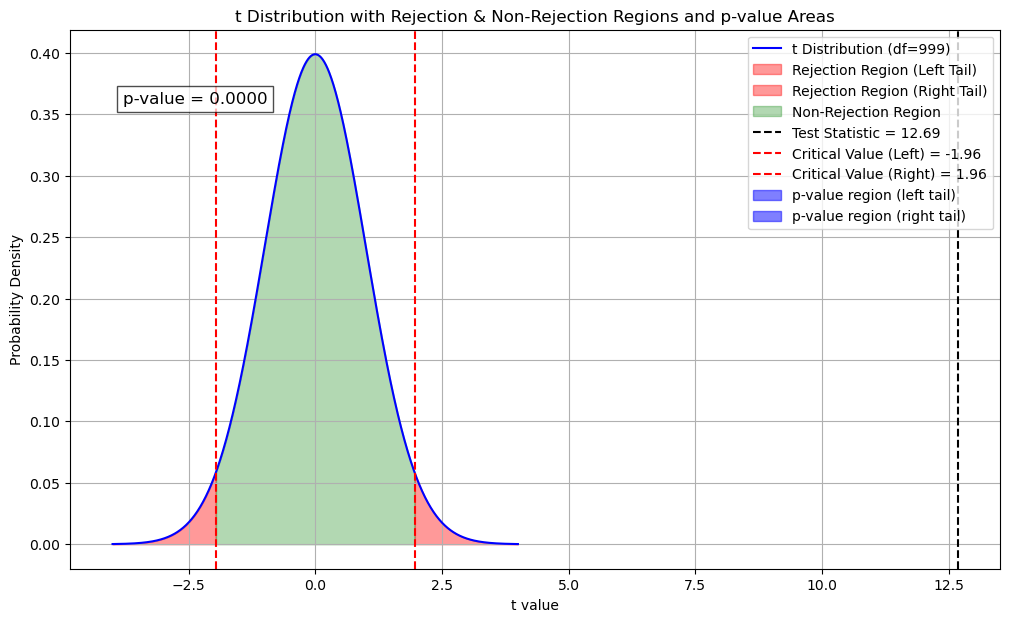

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Sample statistics
sample_mean = 53.53
mu0 = 50
sample_std = 8.8
n = 1000
alpha = 0.05
df = n - 1

# Compute standard error
se = sample_std / np.sqrt(n)

# Compute t statistic
t_stat = (sample_mean - mu0) / se

# Critical values for two-tailed test
t_crit_low = t.ppf(alpha / 2, df)
t_crit_high = t.ppf(1 - alpha / 2, df)

# Calculate two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Prepare t distribution curve
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.figure(figsize=(12, 7))
plt.plot(x, y, label=f't Distribution (df={df})', color='blue')

# Fill rejection regions (tails)
plt.fill_between(x, 0, y, where=(x <= t_crit_low), color='red', alpha=0.4, label='Rejection Region (Left Tail)')
plt.fill_between(x, 0, y, where=(x >= t_crit_high), color='red', alpha=0.4, label='Rejection Region (Right Tail)')

# Fill non-rejection region (middle)
plt.fill_between(x, 0, y, where=(x > t_crit_low) & (x < t_crit_high), color='green', alpha=0.3, label='Non-Rejection Region')

# Mark the calculated t statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f'Test Statistic = {t_stat:.2f}')

# Mark critical values
plt.axvline(t_crit_low, color='red', linestyle='--', label=f'Critical Value (Left) = {t_crit_low:.2f}')
plt.axvline(t_crit_high, color='red', linestyle='--', label=f'Critical Value (Right) = {t_crit_high:.2f}')

# Fill p-value areas (two tails beyond |t_stat|)
plt.fill_between(x, 0, y, where=(x <= -abs(t_stat)), color='blue', alpha=0.5, label='p-value region (left tail)')
plt.fill_between(x, 0, y, where=(x >= abs(t_stat)), color='blue', alpha=0.5, label='p-value region (right tail)')

# Add p-value text on the plot
plt.text(-3.8, max(y)*0.9, f'p-value = {p_value:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.title('t Distribution with Rejection & Non-Rejection Regions and p-value Areas')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [24]:
import scipy.stats as st

# we are given a set basic statistics of two samples to be tested, instead of raw sample values.
# the basic statistics of sample 1:
x_bar1 = 105.32
s1 = 14.68
n1 = 57

# the basic statistics of sample 2:
x_bar2 = 96.82
s2 = 14.26
n2 = 17

# perform two-sample t-test
# null hypothesis: mean of sample 1 = mean of sample 2
# alternative hypothesis: mean of sample 1 does not equal mean of sample 2 (two-sided test)
# note the argument equal_var=False, which assumes that two populations do not have equal variance
t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='two-sided')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

print("\n Conclusion:")
if p_val < 0.05:
    print("\t We reject the null hypothesis.")
else:
    print("\t We accept the null hypothesis.")


 Computing t* ...
	 t-statistic (t*): 2.14

 Computing p-value ...
	 p-value: 0.0414

 Conclusion:
	 We reject the null hypothesis.
